In [4]:
# Task 2 — Titanic EDA & Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Create directories
os.makedirs("data", exist_ok=True)
os.makedirs("outputs/figures", exist_ok=True)


In [5]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Save a local copy
titanic.to_csv("data/titanic.csv", index=False)

print("Dataset loaded successfully!")
titanic.head()


Dataset loaded successfully!


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Shape and data info
print("Shape of dataset:", titanic.shape)
print("\nData Info:")
print(titanic.info())

# Summary statistics
titanic.describe(include='all').T


Shape of dataset: (891, 15)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
titanic.isnull().sum().sort_values(ascending=False)


deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [8]:
# Fill missing 'age' with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing 'embarked' with most common value
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
titanic.drop(['deck', 'embark_town'], axis=1, inplace=True)

# Verify cleaning
titanic.isnull().sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2993498018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2993498018.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

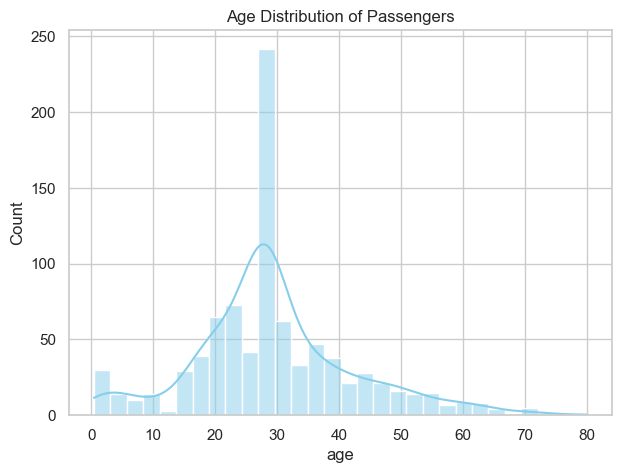

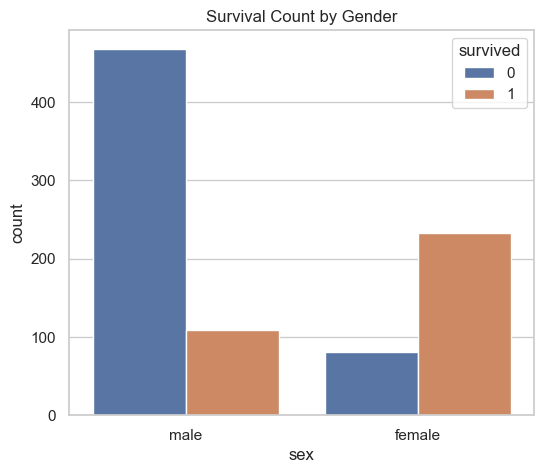

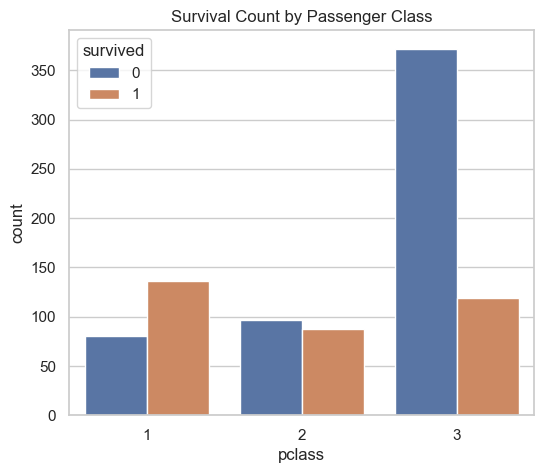

In [9]:
# 1. Age Distribution
plt.figure(figsize=(7,5))
sns.histplot(titanic['age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.savefig("outputs/figures/task02_age_distribution.png")
plt.show()

# 2. Survival Count by Gender
plt.figure(figsize=(6,5))
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title("Survival Count by Gender")
plt.savefig("outputs/figures/task02_survival_gender.png")
plt.show()

# 3. Survival by Passenger Class
plt.figure(figsize=(6,5))
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.savefig("outputs/figures/task02_class_survival.png")
plt.show()


In [10]:
titanic.to_csv("data/titanic_cleaned.csv", index=False)
print("Cleaned Titanic dataset saved successfully!")


Cleaned Titanic dataset saved successfully!
